- handling the missing values, Handling Null Values, 
- Outliers
- Noisy Data - Deleting a particular row
- Calculating the mean
- Outlier detection techniques
- Binning
- Pandas: 
    - Data sub setting - slicing, dicing, using loc, iloc
    - Broadcasting
    - Type casting,anonymous functions, aggregation, summarization
    - creating beautiful tables using styling
- Managing list, dictionary, tuples, data frame - Joining Techniques, SQL fundamentals like joins
- Handling csv, xlsx and pickle files, OS management from python                                                                                                                                                                                            

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./Git Hub/ml-basics/data/diabetes.csv").iloc[:,1:]

In [3]:
d = data.iloc[:,:-1]
label = data['Diabetic']

In [4]:
data.head(5).style.format({"BMI": "${:20,.0f}"})\
                .hide_index()\
                .highlight_max(color='lightgreen')\
                .highlight_min(color='lightblue')

In [5]:
def color_negative_red(val):
    color = 'red' if val < 50 else 'black'
    return 'color: %s' % color
data.head(5).style.applymap(color_negative_red)


In [72]:
data.shape

(15000, 9)

In [73]:
pd.options.display.float_format = "{:.2f}".format

In [74]:
data.describe().style.set_properties(**{'background-color': 'lightgreen',                                                   
                                    'color': 'Black',                       
                                    'border-color': 'Black'})\
                .format({"BMI": "{:20,.2f}"})

In [7]:
Missing_Col = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']

In [8]:
data.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [9]:
for i in Missing_Col:
    d[i].replace(0,data[i].mean(),inplace = True)

# Binning

In [84]:
bins = [ 0, 14, 24, 64, 100]
data['bins'] = pd.cut(data['Age'] , bins=bins,
               labels=['Children','Youth','Adults','Seniors'],
               include_lowest=True)
data.bins

0         Youth
1         Youth
2         Youth
3        Adults
4         Youth
          ...  
14995    Adults
14996    Adults
14997     Youth
14998     Youth
14999    Adults
Name: bins, Length: 15000, dtype: category
Categories (4, object): ['Children' < 'Youth' < 'Adults' < 'Seniors']

In [88]:
a = pd.qcut(data['Age'], q = 4, precision=1, labels=['Children','Youth','Adults','Seniors'])
data.bins

0         Youth
1         Youth
2         Youth
3        Adults
4         Youth
          ...  
14995    Adults
14996    Adults
14997     Youth
14998     Youth
14999    Adults
Name: bins, Length: 15000, dtype: category
Categories (4, object): ['Children' < 'Youth' < 'Adults' < 'Seniors']

##### Sampling

In [92]:
from scipy.stats import binned_statistic
x_data = np.arange(0, len(data))
y_data = data['Age']
x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median", bins=2)

In [94]:
x_bins.shape,bin_edges.shape, misc.shape

((2,), (3,), (15000,))

In [95]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [106]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid
a = data.Age.apply(lambda x: set_to_median(x, bin_intervals))
a.value_counts()

35.00    10998
63.00     1446
Name: Age, dtype: int64

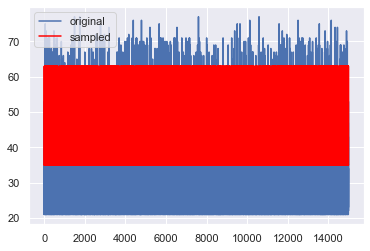

In [101]:
plt.plot(data.Age, label='original')
plt.plot(a, color='red', label='sampled')
plt.legend()
plt.show()

<AxesSubplot:>

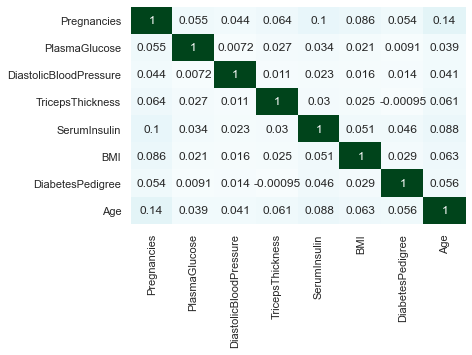

In [10]:
sns.heatmap(d.corr(), cbar = False,cmap = 'BuGn',annot=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'PlasmaGlucose'}>,
        <AxesSubplot:title={'center':'DiastolicBloodPressure'}>],
       [<AxesSubplot:title={'center':'TricepsThickness'}>,
        <AxesSubplot:title={'center':'SerumInsulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Diabetic'}>]], dtype=object)

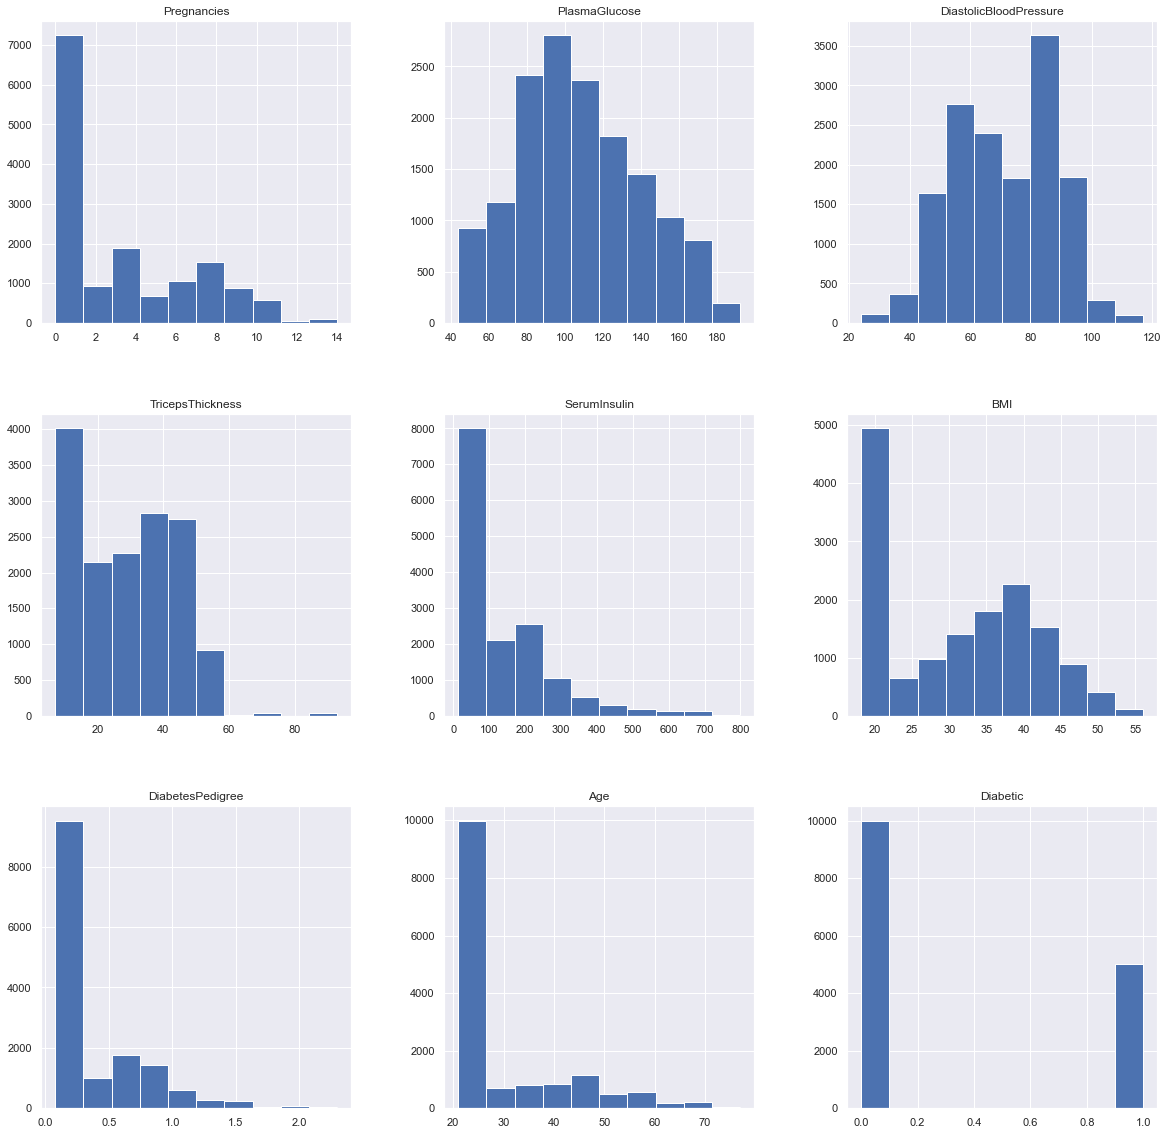

In [11]:
data.hist(figsize = (20,20))

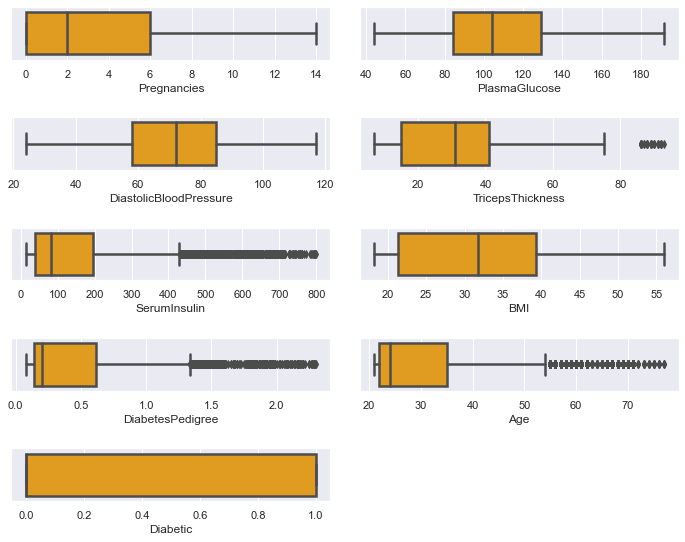

In [12]:
fig = plt.figure(figsize=(10,8))
for index,column in enumerate(list(data.columns)):
    plt.subplot(5,2,index+1)
    sns.boxplot(data.loc[:, column],color="Orange", linewidth=2.5)
fig.tight_layout(pad = 2)

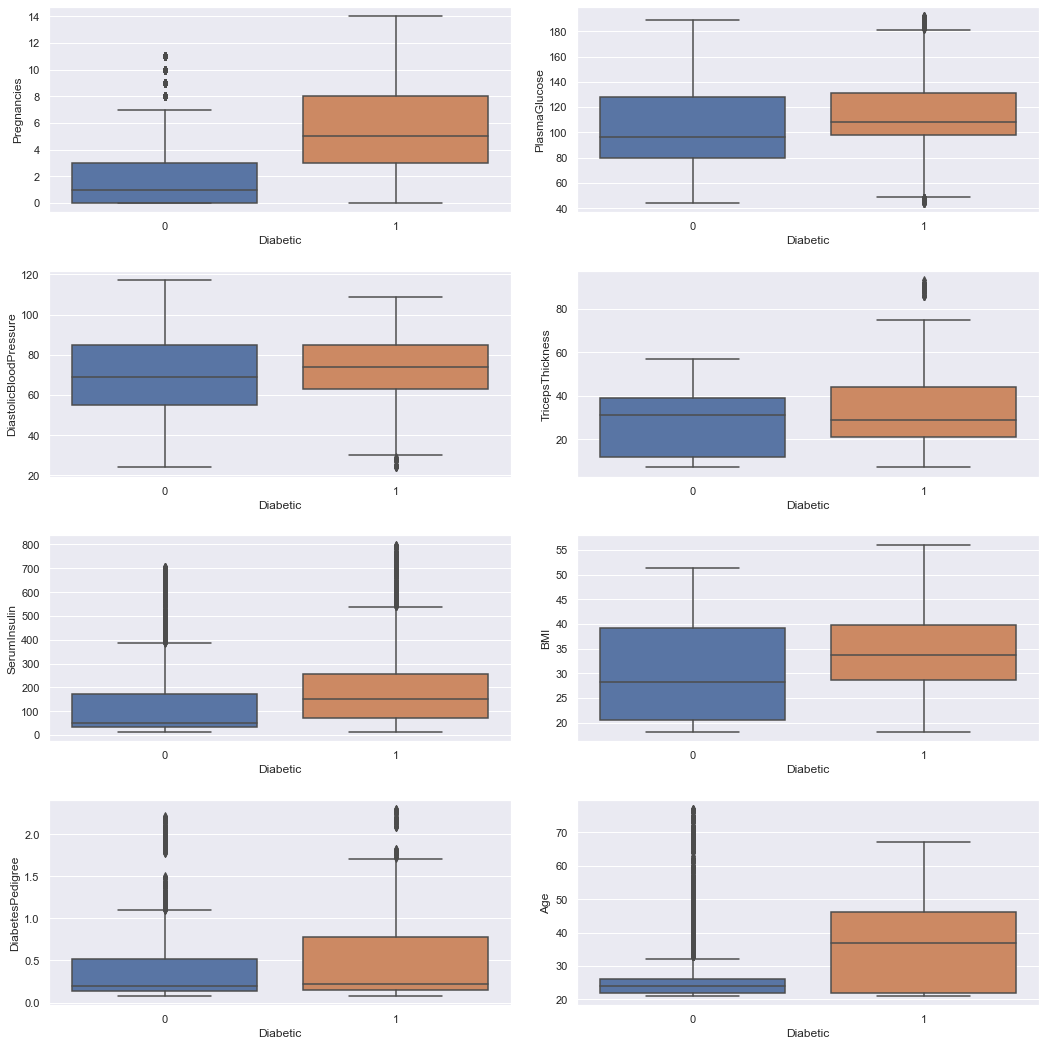

In [13]:
fig = plt.figure(figsize=(15,15))
for i,col in enumerate(list(d.columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = label, y = d[col])
fig.tight_layout(pad = 2)

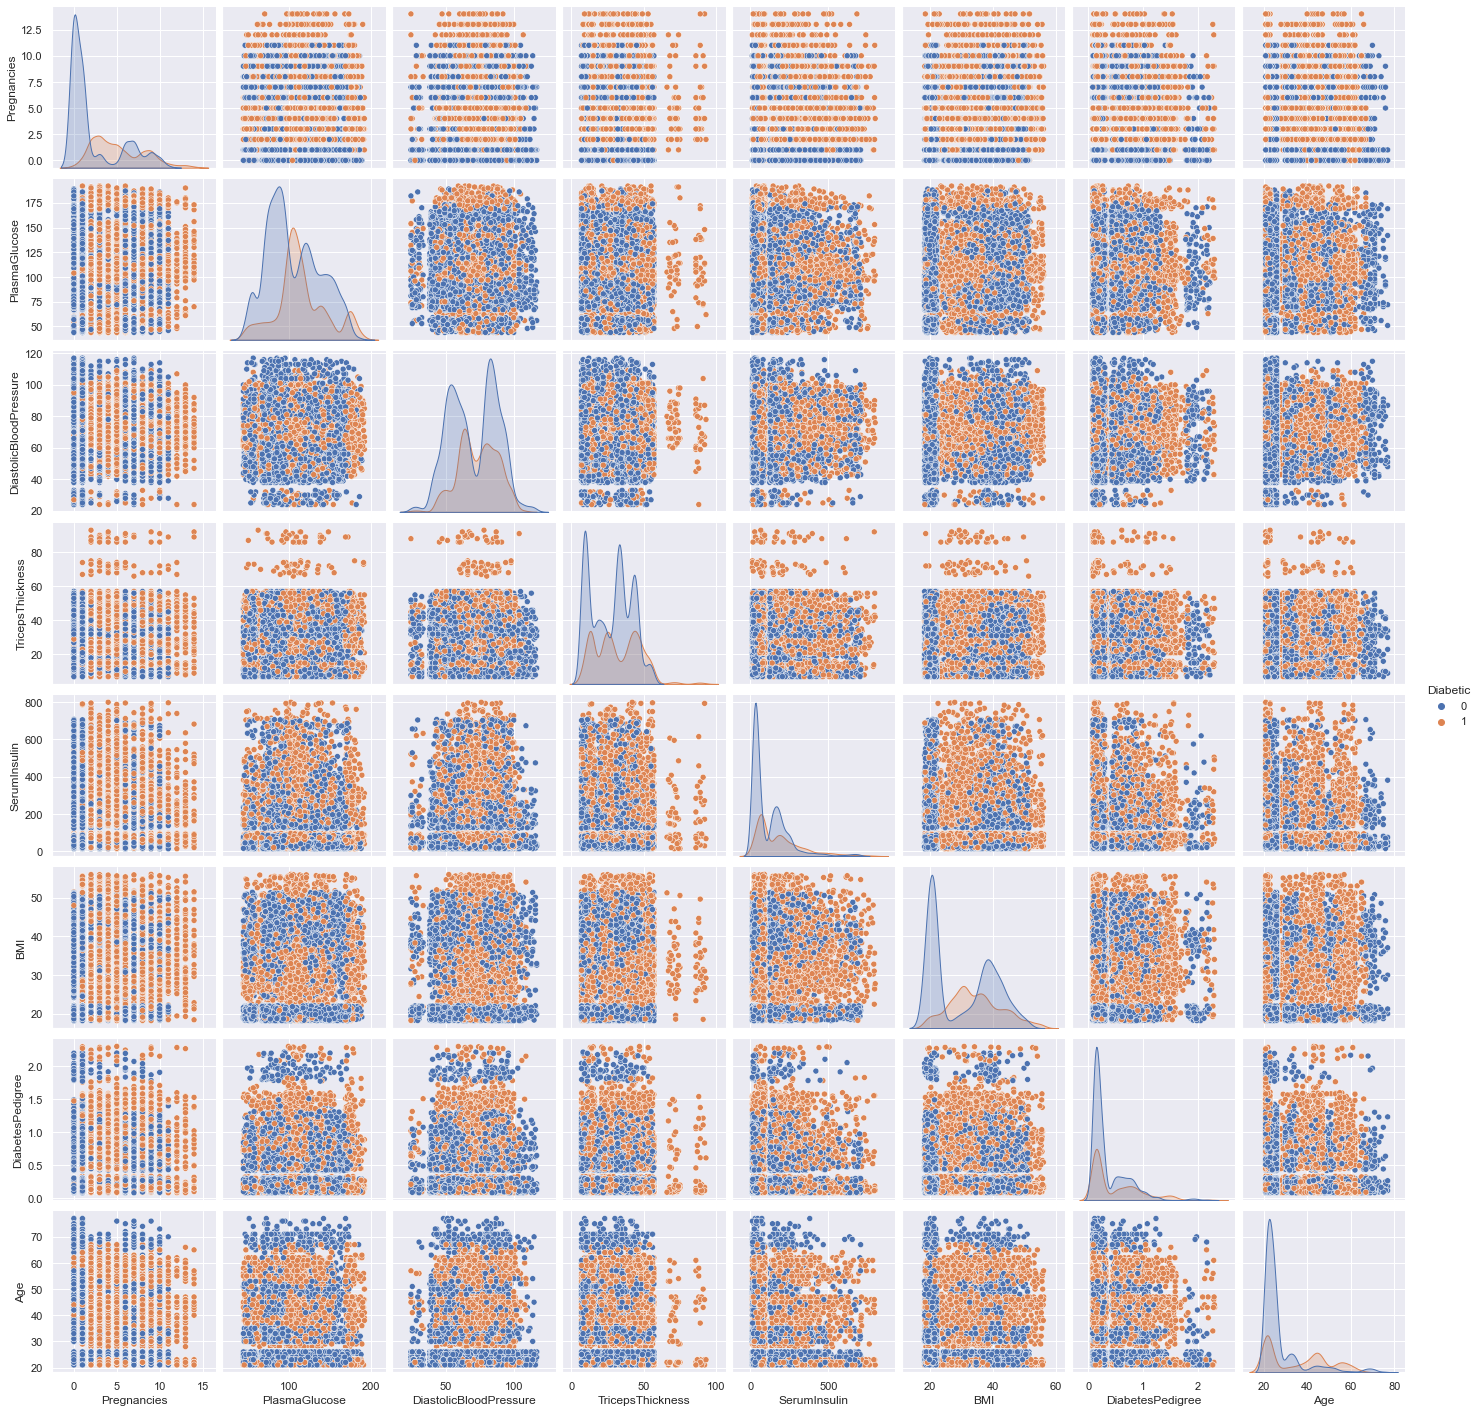

In [14]:
#sns.pairplot(data, hue = 'Diabetic')

# Z - Score

In [15]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
threshold = np.where(z > 3)

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Pregnancies                 6.000000
PlasmaGlucose              45.000000
DiastolicBloodPressure     27.000000
TricepsThickness           26.000000
SerumInsulin              156.000000
BMI                        17.999804
DiabetesPedigree            0.478542
Age                        13.000000
Diabetic                    1.000000
dtype: float64

In [17]:
outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

In [19]:
outlier.sum()

Pregnancies                  0
PlasmaGlucose                0
DiastolicBloodPressure       0
TricepsThickness            31
SerumInsulin               666
BMI                          0
DiabetesPedigree           475
Age                       1019
Diabetic                     0
dtype: int64

In [20]:
dz =data[(z < 3).all(axis=1)]

In [21]:
print("no.of outliers removed:",data.shape[0] - dz.shape[0])

no.of outliers removed: 859


In [22]:
dIQR = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [23]:
print("no.of outliers removed:",data.shape[0] - dIQR.shape[0])

no.of outliers removed: 2055


In [17]:
daata = pd.read_csv("./Datasets- I/titanic.csv")

In [20]:
daata.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [16]:
a = daata.body

In [23]:
a.fillna(value = a.mean()).head()

0    160.809917
1    160.809917
2    160.809917
3    135.000000
4    160.809917
Name: body, dtype: float64